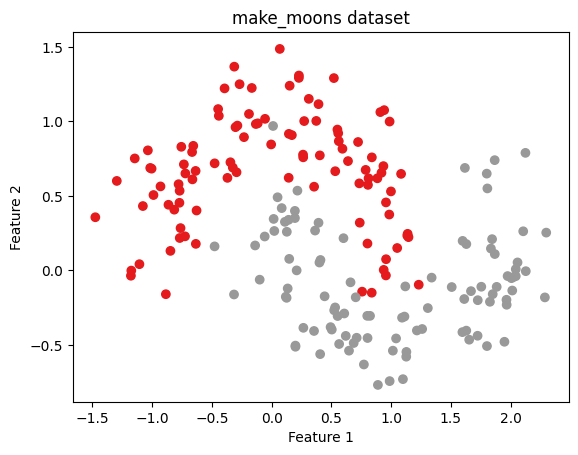

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("make_moons dataset")
plt.show()


In [2]:
X.shape

(200, 2)

Accuracy (PyTorch): 0.850
Accuracy (sklearn): 0.850


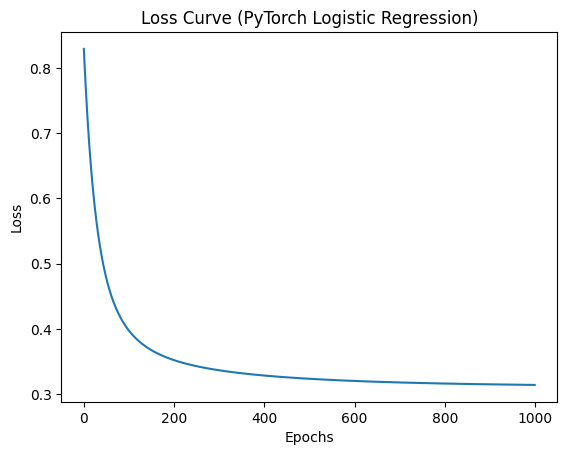

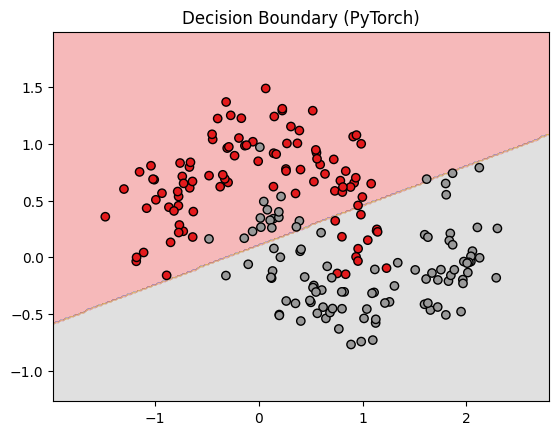

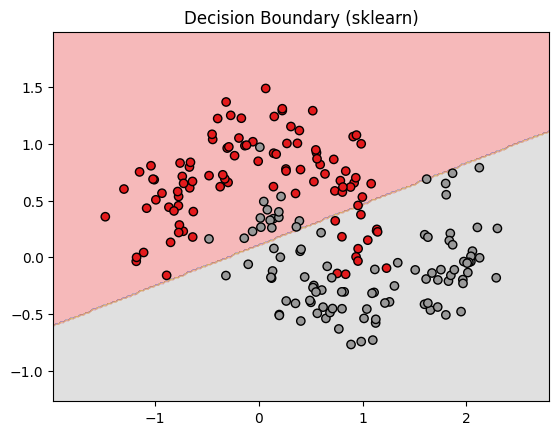

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ======================
# Step 1: Dataset
# ======================
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


# ======================
# Step 2: Logistic Regression Class
# ======================
class LogisticTorch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.model = None
        self.losses = []

    def fit(self, X, y):
        n_features = X.shape[1]
        self.model = nn.Sequential(nn.Linear(n_features, 1), nn.Sigmoid())
        criterion = nn.BCELoss()
        optimizer = optim.SGD(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            y_pred = self.model(X)
            loss = criterion(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            self.losses.append(loss.item())

    def predict_proba(self, X):
        with torch.no_grad():
            return self.model(torch.tensor(X, dtype=torch.float32)).numpy()

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)


# ======================
# Step 3: Train and Compare
# ======================
# PyTorch logistic regression
clf_torch = LogisticTorch(lr=0.1, epochs=1000)
clf_torch.fit(X_tensor, y_tensor)
y_pred_torch = clf_torch.predict(X)
acc_torch = accuracy_score(y, y_pred_torch)

# Sklearn logistic regression
clf_sklearn = LogisticRegression()
clf_sklearn.fit(X, y)
y_pred_sklearn = clf_sklearn.predict(X)
acc_sklearn = accuracy_score(y, y_pred_sklearn)

print(f"Accuracy (PyTorch): {acc_torch:.3f}")
print(f"Accuracy (sklearn): {acc_sklearn:.3f}")


# ======================
# Step 4: Plot Loss Curve
# ======================
plt.plot(clf_torch.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve (PyTorch Logistic Regression)")
plt.show()


# ======================
# Step 5: Decision Boundary
# ======================
def plot_decision_boundary(model, X, y, title, torch_model=True):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if torch_model:
        Z = model.predict(grid)
    else:
        Z = model.predict(grid)

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
    plt.title(title)
    plt.show()


plot_decision_boundary(clf_torch, X, y, "Decision Boundary (PyTorch)", torch_model=True)
plot_decision_boundary(clf_sklearn, X, y, "Decision Boundary (sklearn)", torch_model=False)


In [4]:

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)


In [5]:
X.shape, y.shape

((200, 2), (200,))

In [7]:
dataset = make_moons(n_samples=200, noise=0.2, random_state=42)

In [10]:
import pandas as pd
df = pd.DataFrame(data=dataset[0], columns=["Feature 1", "Feature 2"])
df["Target"] = dataset[1]

In [11]:
df

,Feature 1,Feature 2,Target
0,-1.106897,0.042293,0
1,0.956800,0.456750,0
2,0.733516,0.584617,0
3,1.111407,-0.309214,1
4,0.209082,0.000657,1
...,...,...,...
195,-0.058311,0.228059,1
196,0.737210,0.320761,0
197,-1.475982,0.357239,0
198,1.883321,-0.109890,1
